<a href="https://colab.research.google.com/github/kimberlyydanij/python_demo/blob/master/python_25_naver_movie_review_wordcloud_story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 워드클라우드와 텍스트 마이닝

### colab 한글화

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,763 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

### jpype 설치

In [2]:
#https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype
#아래부분 바로 실행하면 jpype설치 됨
!pip install -U "jpype1<1.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.8 MB 4.9 MB/s 


# https://konlpy.org/ko/latest/

In [3]:
# 한글을 사용하기 위해 세종사전을 이용
!pip install konlpy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


In [3]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

## 데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [4]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh                         2.3.3
branca

### 데이터 가져오기

In [8]:
#utf-8 codec can't decode byte 0xb9 in position 0: invalid start byte
df = pd.read_csv('data_crowing/data.csv', encoding='cp949')
df.head()

,번호,재학생구분,학년/학기,학과,성별,text
0,65,대학,1,인문계열,여,1학기 때 책 읽으려고 갔는데 먼지가 있었어요. 그래서 책상에 먼지가 없었으면 좋겠어요.
1,78,대학,3,사회계열,여,KC대학교도서관 재건축해주세요
2,100,대학,1,사회계열,여,개인스터디할공간이 필요
3,129,대학,4,인문계열,여,"건물 재건축 및 교체, 내부 리모델링"
4,37,대학,2,인문계열,남,공부를 할 수 있는 시설이 개선되었으면 좋겠습니다


### 명사단어 추출

### 1. 세종사전 실행

In [7]:
from konlpy.tag import Okt
twitter = Okt()

2. 단어 리스트 만들기기

In [10]:
word_list = []
word_list = df['text']

### 3. 형태소 분리 및 품사 태깅

In [11]:
sentences_tag = []

for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('해당', 'Noun'), ('학기', 'Noun'), ('에', 'Josa'), ('쓰는', 'Verb'), ('전', 'Modifier'), ('공책', 'Noun'), ('등', 'Noun'), ('을', 'Josa'), ('구비', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('그', 'Noun'), ('외', 'Noun'), ('에도', 'Josa'), ('최신', 'Noun'), ('도서', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('들어왔으면', 'Verb'), ('좋겠다', 'Adjective')]


### 4.명사만 추출

In [12]:
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      noun_list.append(word)

In [ ]:
noun_list

### 5. 명사가 두문자 이상만 추출

In [16]:
len(noun_list)
noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:10]

['학기', '먼지', '책상', '먼지', '대학교', '도서관', '재건축', '개인', '스터디', '공간']

### 6. 단어 카운트

In [18]:
counts = Counter(noun_list)
tags = counts.most_common(30)
print(len(tags))
tags

30


[('도서관', 36),
 ('공간', 28),
 ('공부', 17),
 ('시설', 12),
 ('학교', 12),
 ('학생', 11),
 ('도서', 11),
 ('이용', 10),
 ('환경', 9),
 ('최신', 9),
 ('생각', 8),
 ('자료', 8),
 ('열람', 7),
 ('조금', 7),
 ('학습', 6),
 ('개선', 5),
 ('다른', 5),
 ('먼지', 4),
 ('개인', 4),
 ('건물', 4),
 ('관련', 4),
 ('우리', 4),
 ('부분', 4),
 ('학기', 3),
 ('스터디', 3),
 ('모델링', 3),
 ('마련', 3),
 ('대학', 3),
 ('저희', 3),
 ('전공', 3)]

### WordCloud생성

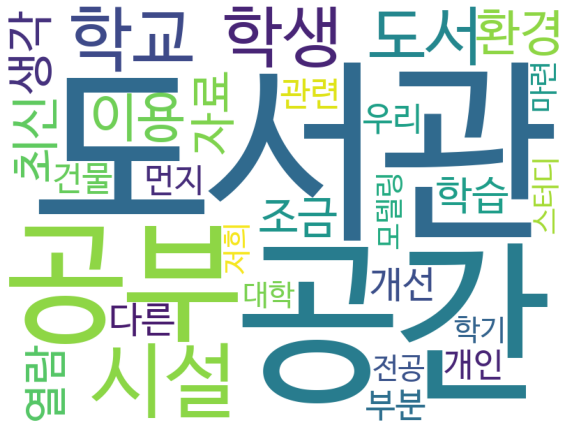

In [23]:
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()